In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
%matplotlib inline
%config InlineBackend.figure_formats = ["retina"]

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [34]:
def add_deviation_feature(X, feature, category):

    # temp groupby object
    category_gb = X.groupby(category)[feature]

    # create category means and standard deviations for each observation
    category_mean = category_gb.transform(lambda x: x.mean())
    category_std = category_gb.transform(lambda x: x.std())

    # compute stds from category mean for each feature value,
    # add to X as new feature
    deviation_feature = (X[feature] - category_mean) / category_std
    X[feature + '_Dev_' + category] = deviation_feature

In [4]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Ames_Housing_Data.tsv", sep='\t')

In [5]:
# This is recommended by the data set author to remove a few outliers

df = df.loc[df["Gr Liv Area"] <= 4000,:]
print("Number of rows in the data:", df.shape[0])
print("Number of columns in the data:", df.shape[1])
data = df.copy() # Keep a copy our original data

Number of rows in the data: 2925
Number of columns in the data: 82


In [6]:
# Finding all the categorical features

one_hot_encode_cols = df.dtypes[df.dtypes == np.object]
one_hot_encode_cols = one_hot_encode_cols.index.tolist()

df[one_hot_encode_cols].head().T

0        1        2        3        4
MS Zoning            RL       RH       RL       RL       RL
Street             Pave     Pave     Pave     Pave     Pave
Alley               NaN      NaN      NaN      NaN      NaN
Lot Shape           IR1      Reg      IR1      Reg      IR1
Land Contour        Lvl      Lvl      Lvl      Lvl      Lvl
Utilities        AllPub   AllPub   AllPub   AllPub   AllPub
Lot Config       Corner   Inside   Corner   Corner   Inside
Land Slope          Gtl      Gtl      Gtl      Gtl      Gtl
Neighborhood      NAmes    NAmes    NAmes    NAmes  Gilbert
Condition 1        Norm    Feedr     Norm     Norm     Norm
Condition 2        Norm     Norm     Norm     Norm     Norm
Bldg Type          1Fam     1Fam     1Fam     1Fam     1Fam
House Style      1Story   1Story   1Story   1Story   2Story
Roof Style          Hip    Gable      Hip      Hip    Gable
Roof Matl       CompShg  CompShg  CompShg  CompShg  CompShg
Exterior 1st    BrkFace  VinylSd  Wd Sdng  BrkFace  VinylSd
Exterior 2nd    Plywood  VinylSd  Wd Sdng  BrkFace  VinylSd
Mas Vnr Type      Stone     None  BrkFace     None     None
Exter Qual           TA       TA       TA       Gd       TA
Exter Cond           TA       TA       TA       TA       TA
Foundation       CBlock   CBlock   CBlock   CBlock    PConc
Bsmt Qual            TA       TA       TA       TA       Gd
Bsmt Cond            Gd       TA       TA       TA       TA
Bsmt Exposure        Gd       No       No       No       No
BsmtFin Type 1      BLQ      Rec      ALQ      ALQ      GLQ
BsmtFin Type 2      Unf      LwQ      Unf      Unf      Unf
Heating            GasA     GasA     GasA     GasA     GasA
Heating QC           Fa       TA       TA       Ex       Gd
Central Air           Y        Y        Y        Y        Y
Electrical        SBrkr    SBrkr    SBrkr    SBrkr    SBrkr
Kitchen Qual         TA       TA       Gd       Ex       TA
Functional          Typ      Typ      Typ      Typ      Typ
Fireplace Qu         Gd      NaN      NaN       TA       TA
Garage Type      Attchd   Attchd   Attchd   Attchd   Attchd
Garage Finish       Fin      Unf      Unf      Fin      Fin
Garage Qual          TA       TA       TA       TA       TA
Garage Cond          TA       TA       TA       TA       TA
Paved Drive           P        Y        Y        Y        Y
Pool QC             NaN      NaN      NaN      NaN      NaN
Fence               NaN    MnPrv      NaN      NaN    MnPrv
Misc Feature        NaN      NaN     Gar2      NaN      NaN
Sale Type           WD       WD       WD       WD       WD 
Sale Condition   Normal   Normal   Normal   Normal   Normal

In [7]:
# Onehot encoding

df = pd.get_dummies(df, columns=one_hot_encode_cols, drop_first=True)
df.describe().T # T is for transpose()

count          mean           std          min  \
Order                   2925.0  1.464795e+03  8.464417e+02          1.0   
PID                     2925.0  7.143931e+08  1.887274e+08  526301100.0   
MS SubClass             2925.0  5.739658e+01  4.266875e+01         20.0   
Lot Frontage            2435.0  6.902382e+01  2.271092e+01         21.0   
Lot Area                2925.0  1.010358e+04  7.781999e+03       1300.0   
...                        ...           ...           ...          ...   
Sale Condition_AdjLand  2925.0  4.102564e-03  6.393067e-02          0.0   
Sale Condition_Alloca   2925.0  8.205128e-03  9.022520e-02          0.0   
Sale Condition_Family   2925.0  1.572650e-02  1.244366e-01          0.0   
Sale Condition_Normal   2925.0  8.246154e-01  3.803608e-01          0.0   
Sale Condition_Partial  2925.0  8.273504e-02  2.755284e-01          0.0   

                                25%          50%          75%           max  
Order                         732.0       1463.0       2199.0  2.930000e+03  
PID                     528477030.0  535453210.0  907180130.0  1.007100e+09  
MS SubClass                    20.0         50.0         70.0  1.900000e+02  
Lot Frontage                   58.0         68.0         80.0  3.130000e+02  
Lot Area                     7438.0       9428.0      11515.0  2.152450e+05  
...                             ...          ...          ...           ...  
Sale Condition_AdjLand          0.0          0.0          0.0  1.000000e+00  
Sale Condition_Alloca           0.0          0.0          0.0  1.000000e+00  
Sale Condition_Family           0.0          0.0          0.0  1.000000e+00  
Sale Condition_Normal           1.0          1.0          1.0  1.000000e+00  
Sale Condition_Partial          0.0          0.0          0.0  1.000000e+00  

[262 rows x 8 columns]

In [8]:
# Check for skewing

mask = data.dtypes == np.float
float_cols = data.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = data[float_cols].skew()

In [9]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

Skew
BsmtFin SF 2    4.135900
Bsmt Half Bath  3.965970
Mas Vnr Area    2.565458
Lot Frontage    1.111071
Bsmt Unf SF     0.925021
BsmtFin SF 1    0.821985

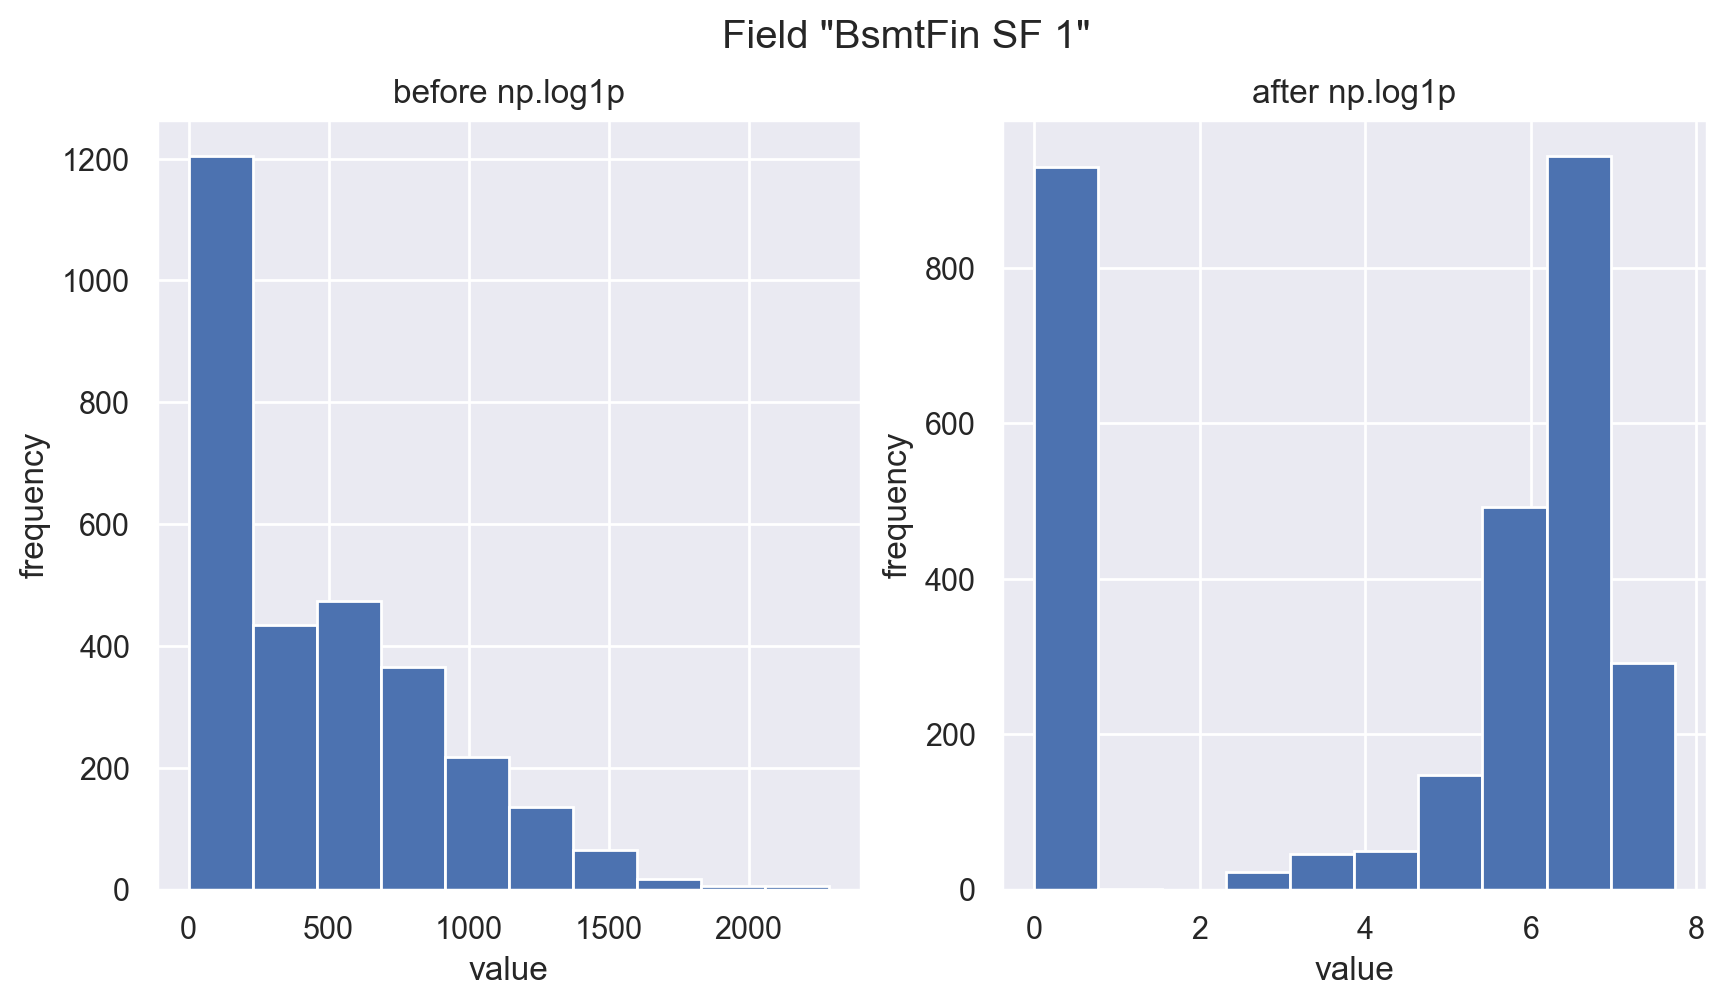

In [17]:
field = "BsmtFin SF 1"

fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))

df[field].hist(ax=ax_before)

df[field].apply(np.log1p).hist(ax=ax_after)

ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [18]:
for col in skew_cols.index.values:
    if col == "SalesPrice":
        continue
    df[col] = df[col].apply(np.log1p)

In [19]:
df.shape

(2925, 262)

In [20]:
df = data
data.isnull().sum().sort_values()

Order                0
Sale Condition       0
Heating QC           0
Central Air          0
1st Flr SF           0
                  ... 
Fireplace Qu      1422
Fence             2354
Alley             2727
Misc Feature      2820
Pool QC           2914
Length: 82, dtype: int64

In [21]:
smaller_df= df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars','SalePrice']]

In [22]:
smaller_df.describe().T

count           mean           std      min       25%  \
Lot Area        2925.0   10103.583590   7781.999124   1300.0    7438.0   
Overall Qual    2925.0       6.088205      1.402953      1.0       5.0   
Overall Cond    2925.0       5.563761      1.112262      1.0       5.0   
Year Built      2925.0    1971.302906     30.242474   1872.0    1954.0   
Year Remod/Add  2925.0    1984.234188     20.861774   1950.0    1965.0   
Gr Liv Area     2925.0    1493.978803    486.273646    334.0    1126.0   
Full Bath       2925.0       1.564786      0.551386      0.0       1.0   
Bedroom AbvGr   2925.0       2.853675      0.827737      0.0       2.0   
Fireplaces      2925.0       0.596923      0.645349      0.0       0.0   
Garage Cars     2924.0       1.765048      0.759834      0.0       1.0   
SalePrice       2925.0  180411.574701  78554.857286  12789.0  129500.0   

                     50%       75%       max  
Lot Area          9428.0   11515.0  215245.0  
Overall Qual         6.0       7.0      10.0  
Overall Cond         5.0       6.0       9.0  
Year Built        1973.0    2001.0    2010.0  
Year Remod/Add    1993.0    2004.0    2010.0  
Gr Liv Area       1441.0    1740.0    3820.0  
Full Bath            2.0       2.0       4.0  
Bedroom AbvGr        3.0       3.0       8.0  
Fireplaces           1.0       1.0       4.0  
Garage Cars          2.0       2.0       5.0  
SalePrice       160000.0  213500.0  625000.0

In [23]:
smaller_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
 10  SalePrice       2925 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 274.2 KB


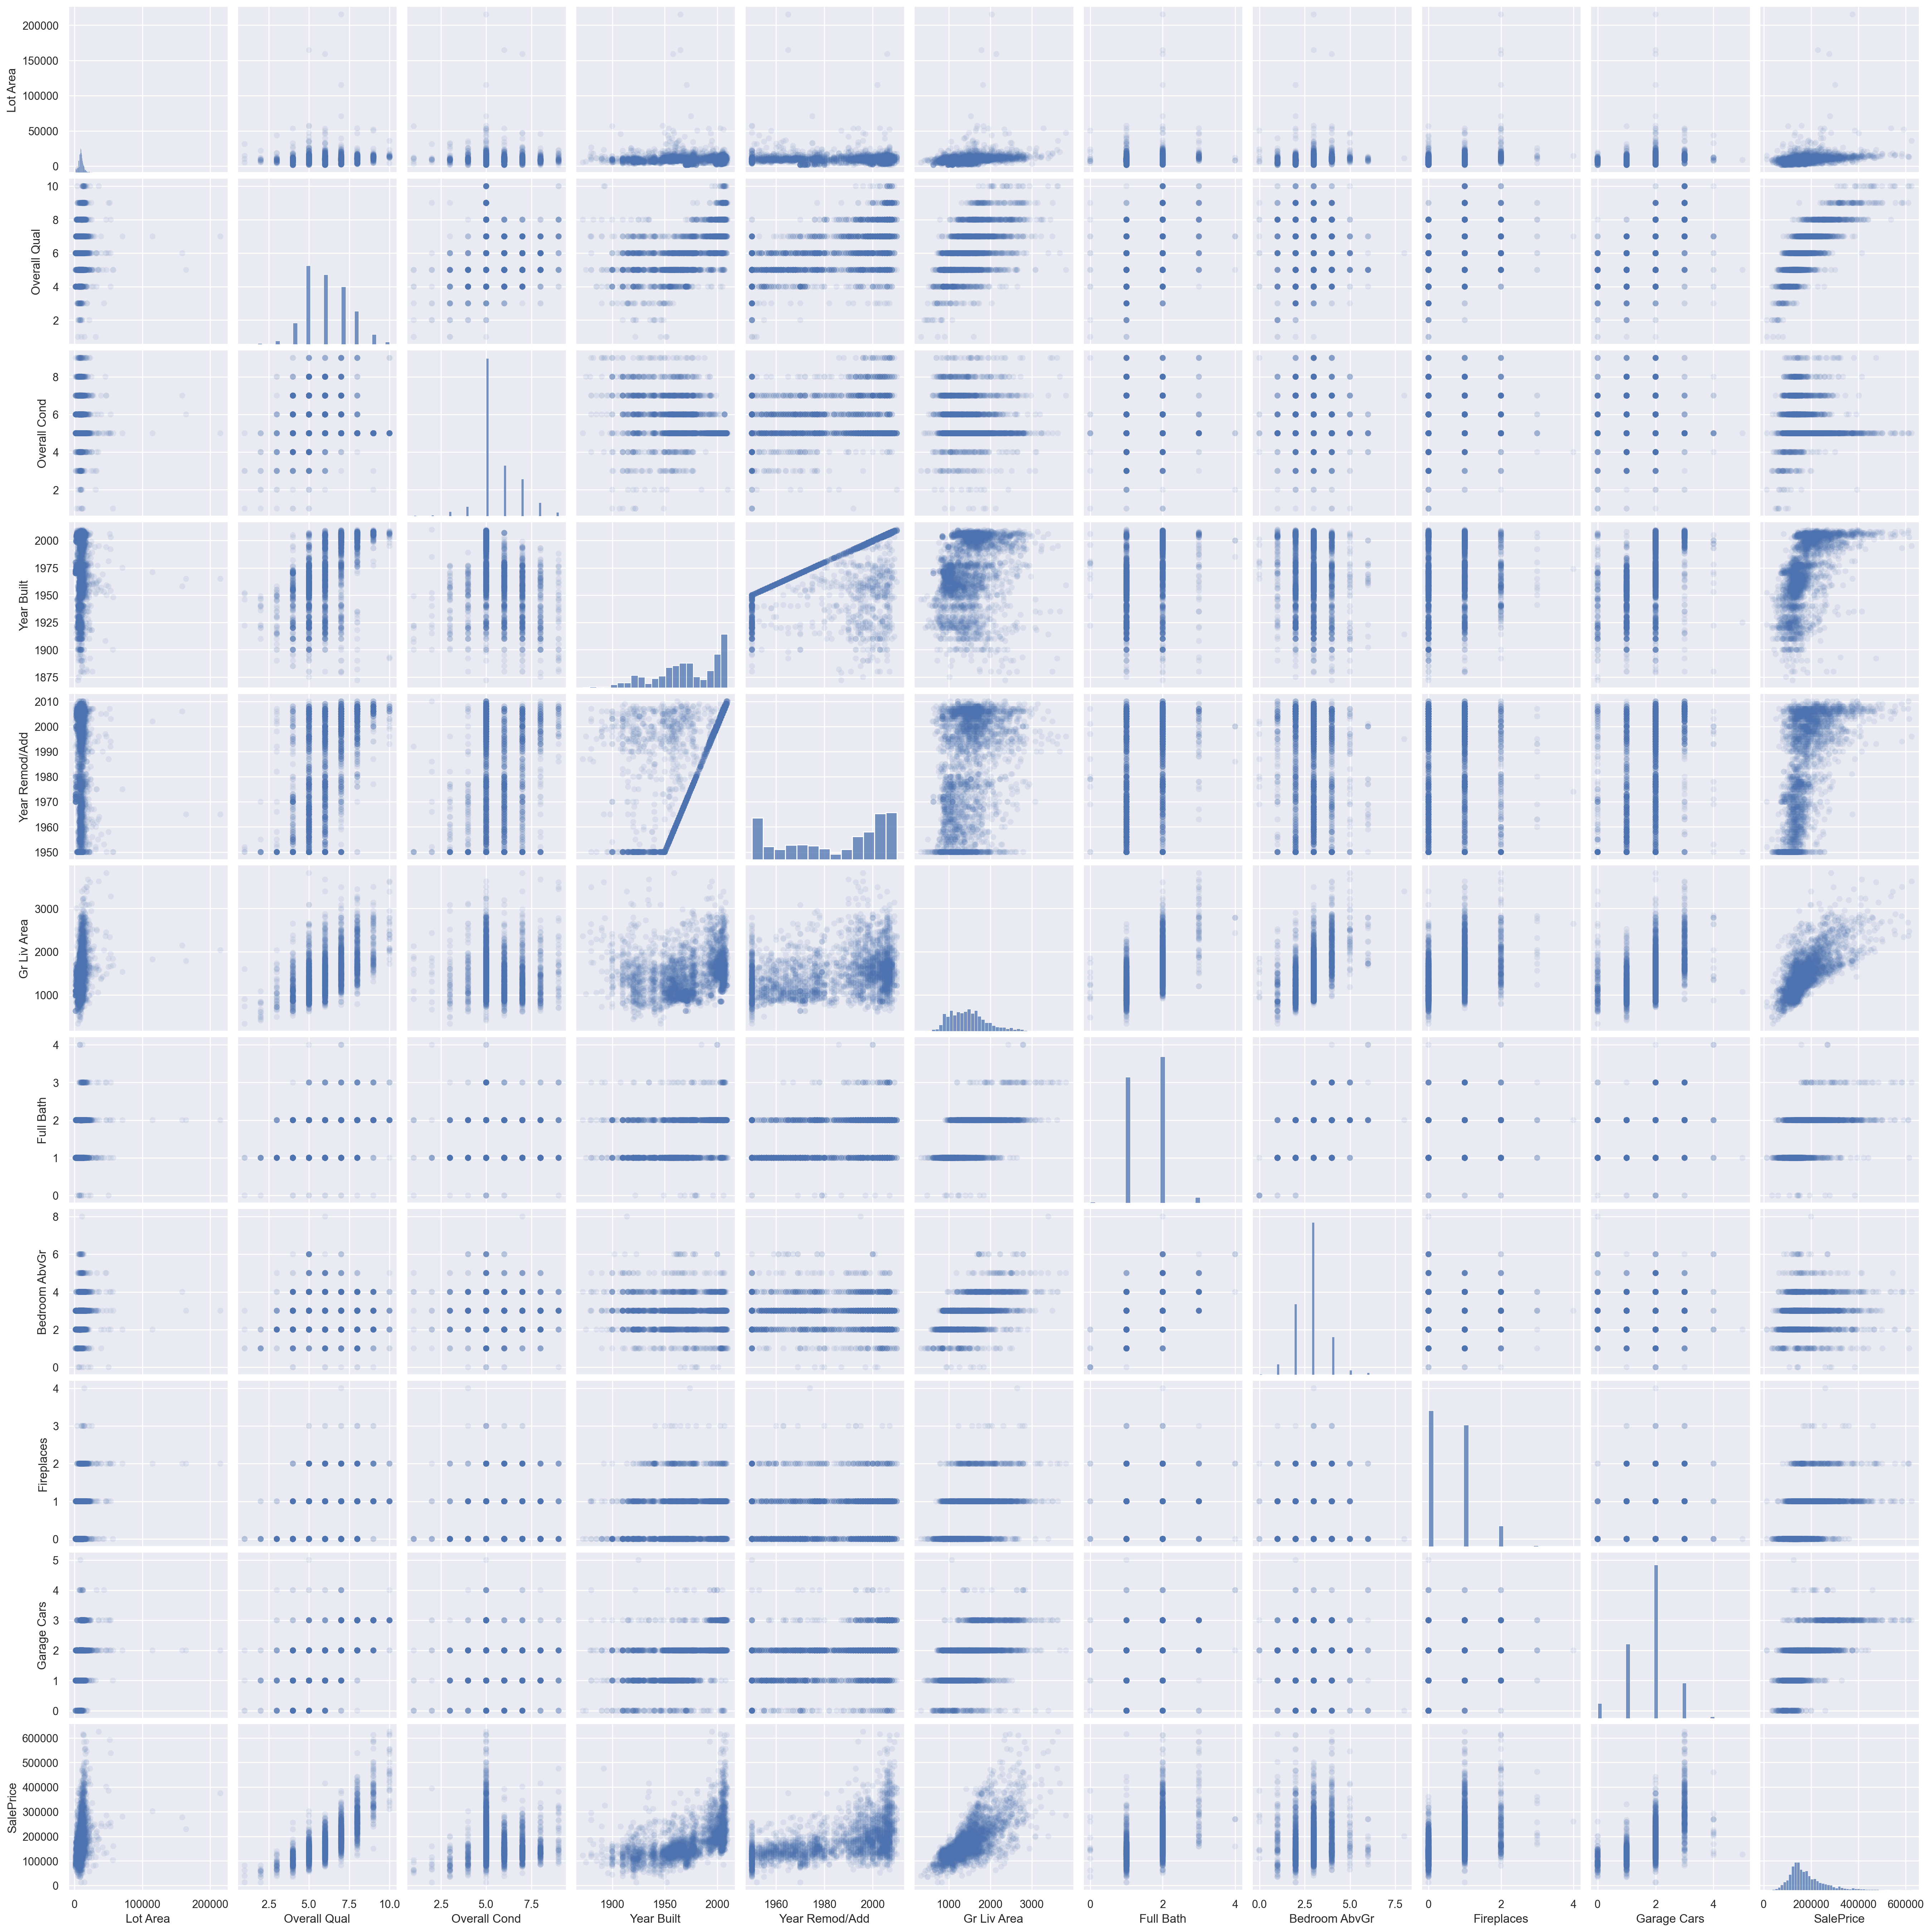

In [24]:
sns.pairplot(smaller_df, plot_kws=dict(alpha=.1, edgecolor="none"))

In [25]:
X = smaller_df.loc[:,['Lot Area', 'Overall Qual', 'Overall Cond',
                      'Year Built', 'Year Remod/Add', 'Gr Liv Area',
                      'Full Bath', 'Bedroom AbvGr', 'Fireplaces',
                      'Garage Cars']]

y = smaller_df['SalePrice']

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2925 entries, 0 to 2929
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Lot Area        2925 non-null   int64  
 1   Overall Qual    2925 non-null   int64  
 2   Overall Cond    2925 non-null   int64  
 3   Year Built      2925 non-null   int64  
 4   Year Remod/Add  2925 non-null   int64  
 5   Gr Liv Area     2925 non-null   int64  
 6   Full Bath       2925 non-null   int64  
 7   Bedroom AbvGr   2925 non-null   int64  
 8   Fireplaces      2925 non-null   int64  
 9   Garage Cars     2924 non-null   float64
dtypes: float64(1), int64(9)
memory usage: 251.4 KB


In [27]:
X2 = X.copy()

X2["OQ2"] = X2["Overall Qual"] ** 2
X2["GLA2"] = X2["Gr Liv Area"] ** 2

In [28]:
X3 = X2.copy()

# multiplicative interaction
X3['OQ_x_YB'] = X3['Overall Qual'] * X3['Year Built']

# division interaction
X3['OQ_/_LA'] = X3['Overall Qual'] / X3['Lot Area']

In [29]:
data["House Style"].value_counts()

1Story    1480
2Story     869
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: House Style, dtype: int64

In [30]:
pd.get_dummies(df["House Style"], drop_first=True).head()

1.5Unf  1Story  2.5Fin  2.5Unf  2Story  SFoyer  SLvl
0       0       1       0       0       0       0     0
1       0       1       0       0       0       0     0
2       0       1       0       0       0       0     0
3       0       1       0       0       0       0     0
4       0       0       0       0       1       0     0

In [31]:
nbh_counts = df.Neighborhood.value_counts()
nbh_counts

NAmes      443
CollgCr    267
OldTown    239
Edwards    191
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     69
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [32]:
other_nbhs = list(nbh_counts[nbh_counts <= 8].index)

other_nbhs

['Greens', 'GrnHill', 'Landmrk']

In [33]:
X4 = X3.copy()

X4['Neighborhood'] = df['Neighborhood'].replace(other_nbhs, 'Other')

In [35]:
X5 = X4.copy()
X5["House Style"] = df["House Style"]
add_deviation_feature(X5, "Year Built", "House Style")
add_deviation_feature(X5, "Overall Qual", "Neighborhood")

In [38]:
pf = PolynomialFeatures(degree=2)

In [41]:
features = ['Lot Area', 'Overall Qual']
pf.fit(df[features])

PolynomialFeatures()

In [44]:
pf.get_feature_names_out(input_features=features)

array(['1', 'Lot Area', 'Overall Qual', 'Lot Area^2',
       'Lot Area Overall Qual', 'Overall Qual^2'], dtype=object)

In [45]:
feat_array = pf.transform(df[features])
pd.DataFrame(feat_array, columns=pf.get_feature_names_out(input_features=features))

1  Lot Area  Overall Qual    Lot Area^2  Lot Area Overall Qual  \
0     1.0   31770.0           6.0  1.009333e+09               190620.0   
1     1.0   11622.0           5.0  1.350709e+08                58110.0   
2     1.0   14267.0           6.0  2.035473e+08                85602.0   
3     1.0   11160.0           7.0  1.245456e+08                78120.0   
4     1.0   13830.0           5.0  1.912689e+08                69150.0   
...   ...       ...           ...           ...                    ...   
2920  1.0    7937.0           6.0  6.299597e+07                47622.0   
2921  1.0    8885.0           5.0  7.894322e+07                44425.0   
2922  1.0   10441.0           5.0  1.090145e+08                52205.0   
2923  1.0   10010.0           5.0  1.002001e+08                50050.0   
2924  1.0    9627.0           7.0  9.267913e+07                67389.0   

      Overall Qual^2  
0               36.0  
1               25.0  
2               36.0  
3               49.0  
4               25.0  
...              ...  
2920            36.0  
2921            25.0  
2922            25.0  
2923            25.0  
2924            49.0  

[2925 rows x 6 columns]